## One Shot Learning using Siamese Networks
In this file, we try to use Siamese Networks to train a model in case of less training data. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

%matplotlib inline

In [2]:
# For displaying multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Load the images

In [3]:
image_dir = '/home/gaurav/datasets/agri/Tomato_Classifier/MultiClassData/'

healthy_images_dir = image_dir + 'Tomato___healthy/'
bacterial_spot_images_dir = image_dir + 'Tomato___Bacterial_spot/'
early_blight_images_dir = image_dir + 'Tomato___Early_blight/'
late_blight_images_dir = image_dir + 'Tomato___Late_blight/'
leaf_mold_images_dir = image_dir + 'Tomato___Leaf_Mold/'
septoria_leaf_spot_images_dir = image_dir + 'Tomato___Septoria_leaf_spot/'
two_spotted_spider_mites_images_dir = image_dir + 'Tomato___Spider_mites_Two_spotted_spider_mite/'
target_spot_images_dir = image_dir + 'Tomato___Target_Spot/'
mosaic_virus_images_dir = image_dir + 'Tomato___Tomato_mosaic_virus/'
yellow_leaf_curl_virus_images_dir = image_dir + 'Tomato___Tomato_Yellow_Leaf_Curl_Virus/'

In [4]:
# Define a function to load an image file from a directory
def loadImageFiles(dir):
    files = [(dir + '/'+ f)
             for f in os.listdir(dir)
             if f.endswith('.jpg')]
    return files

In [5]:
# load all the image files
healthy_images_files = loadImageFiles(healthy_images_dir)
bacterial_spot_images_files = loadImageFiles(bacterial_spot_images_dir)
early_blight_images_files = loadImageFiles(early_blight_images_dir)
late_blight_images_files = loadImageFiles(late_blight_images_dir)
leaf_mold_images_files = loadImageFiles(leaf_mold_images_dir)
septoria_leaf_spot_images_files = loadImageFiles(septoria_leaf_spot_images_dir)
two_spotted_spider_mites_images_files = loadImageFiles(two_spotted_spider_mites_images_dir)
target_spot_images_files = loadImageFiles(target_spot_images_dir)
mosaic_virus_images_files = loadImageFiles(mosaic_virus_images_dir)
yellow_leaf_curl_virus_images_files = loadImageFiles(yellow_leaf_curl_virus_images_dir)

In [6]:
len(healthy_images_files)

1591

In [7]:
healthy_images_files[0]

'/home/gaurav/datasets/agri/Tomato_Classifier/MultiClassData/Tomato___healthy//1e1aa3d8-d12f-47e1-b316-b8656ab3f2b6___RS_HL 0075_final_masked.jpg'

### For one-shot learning, take 20 images from a particular class

In [8]:
def loadImages(files):
    file_subset = files[0:20]
    images = [cv2.imread(file) for file in file_subset]
    return images

In [9]:
# load all the images from name
healthy_images = loadImages(healthy_images_files)
bacterial_spot_images = loadImages(bacterial_spot_images_files)
early_blight_images = loadImages(early_blight_images_files)
late_blight_images = loadImages(late_blight_images_files)
leaf_mold_images = loadImages(leaf_mold_images_files)
septoria_leaf_spot_images = loadImages(septoria_leaf_spot_images_files)
two_spotted_spider_mites_images = loadImages(two_spotted_spider_mites_images_files)
target_spot_images = loadImages(target_spot_images_files)
mosaic_virus_images = loadImages(mosaic_virus_images_files)
yellow_leaf_curl_virus_images = loadImages(yellow_leaf_curl_virus_images_files)

In [10]:
len(healthy_images)

20

## Image exploration

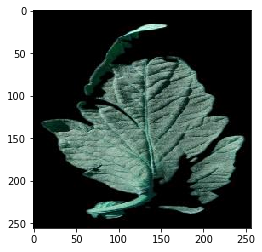

In [11]:
# Healty leaf
plt.imshow( healthy_images[5] )

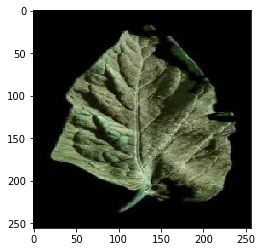

In [12]:
# Diseased leaf
plt.imshow(two_spotted_spider_mites_images[4])

In [13]:
# Image shape
image_shape = healthy_images[0].shape
image_shape

(256, 256, 3)

## Formulating the training, validation, and test set

In [14]:
# Convert the list of images to a numpy array
def numpyConverter(images):
    return np.array(images)

In [15]:
healthy_images_np = numpyConverter(healthy_images)
bacterial_spot_images_np = numpyConverter(bacterial_spot_images)
early_blight_images_np = numpyConverter(early_blight_images)
late_blight_images_np = numpyConverter(late_blight_images)
leaf_mold_images_np = numpyConverter(leaf_mold_images)
septoria_leaf_spot_images_np = numpyConverter(septoria_leaf_spot_images)
two_spotted_spider_mites_images_np = numpyConverter(two_spotted_spider_mites_images)
target_spot_images_np = numpyConverter(target_spot_images)
mosaic_virus_images_np = numpyConverter(mosaic_virus_images)
yellow_leaf_curl_virus_images_np = numpyConverter(yellow_leaf_curl_virus_images)

In [16]:
# Validation
yellow_leaf_curl_virus_images_np.shape

(20, 256, 256, 3)

### Formulate the training set 

X: have two parallel input images while Y is 1 if they belong to same cateogry otherwise 0

In [17]:
# X: Concatenate all images
all_images_np = np.stack( (healthy_images_np, bacterial_spot_images_np,
                                 early_blight_images_np, late_blight_images_np, 
                                 leaf_mold_images_np, septoria_leaf_spot_images_np, 
                                 two_spotted_spider_mites_images_np, target_spot_images_np,
                                 mosaic_virus_images_np, yellow_leaf_curl_virus_images_np), axis = 0 )

In [18]:
all_images_np.shape
n_classes, n_images_per_class, w, h, _ = all_images_np.shape

(10, 20, 256, 256, 3)

In [19]:
import random

def formulateBatch(batchSize: int):
    # generate two images, one from same batch and other from different batch
    training_pairs = []
    training_labels = []
    
    for index in range(batchSize):
        # choose a random class
        get_anchor_index = random.choice(range(n_classes))
        
        # select two images from the anchor class
        positive_image_index_1 = random.choice(range(n_images_per_class))
        postive_image_1 = all_images_np[get_anchor_index, positive_image_index_1]
        positive_image_index_2 = random.choice(range(n_images_per_class))
        postive_image_2 = all_images_np[get_anchor_index, positive_image_index_2]
        y_positive_label = 1
        
        # Select two images one from the anchor class and one from the negative class
        negative_class_index_list =  list(range(n_classes))
        negative_class_index_list.remove(get_anchor_index)
        negative_class_index = random.choice(negative_class_index_list)
        negative_image_index = random.choice(range(n_images_per_class))
        negative_image = all_images_np[negative_class_index, negative_image_index]
        y_negative_label = 0
        
        # generate pairs
        X_positive_pair = np.stack((postive_image_1,postive_image_2), 0)
        training_pairs.append(X_positive_pair)
        training_labels.append(y_positive_label)
        X_negative_pair = np.stack((postive_image_1,negative_image), 0)
        training_pairs.append(X_negative_pair)
        training_labels.append(y_negative_label)
    
    training_pairs_np = np.array(training_pairs)
    return training_pairs_np, training_labels
        

In [20]:
# Generate training batch
X_pairs, Y_labels = formulateBatch(2000)

### Sanity Check

In [21]:
# X = (training_examples, no_of_images, w, h, c) and Y = 1 if two images are same else 0
X_pairs.shape
len(Y_labels)

(4000, 2, 256, 256, 3)

4000

In [22]:
def sanity_checker( idx ):
    plt.imshow( X_pairs[idx,0] )
    plt.show();
    plt.imshow( X_pairs[idx,1] )
    plt.show();
    print( Y_labels[idx])

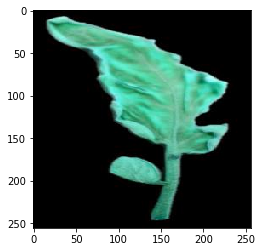

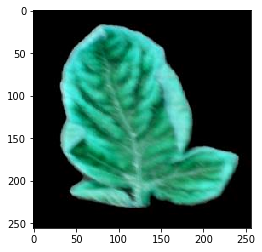

1


In [23]:
sanity_checker(100)

## Train and test split

## Model: One shot learning

In [24]:
import keras
import tensorflow as tf
from keras import backend as K

Using TensorFlow backend.
/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [25]:
# import necessary building blocks
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, Input, Lambda, merge
from keras.layers.advanced_activations import LeakyReLU

### Define the Siamese Network

In [26]:
K.clear_session()  # clear default graph

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), strides=1, padding='same', input_shape=image_shape))
model.add(LeakyReLU(0.1))        
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='same', input_shape=image_shape))
model.add(LeakyReLU(0.1))   
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1, padding='same', input_shape=image_shape))
model.add(LeakyReLU(0.1))     
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(filters=128, kernel_size=(3,3), strides=1, padding='same', input_shape=image_shape))
model.add(LeakyReLU(0.1))     
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Flatten())
    
model.add(Dense(128))

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 16)      448       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256, 256, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 85, 85, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 85, 85, 32)        4640      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 85, 85, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
__________

In [28]:
# Creates the two netwoks
first_input = Input(image_shape)
second_input = Input(image_shape)
first_network_encoded = model(first_input)
second_network_encoded = model(second_input)

In [29]:
first_network_encoded.shape

TensorShape([Dimension(None), Dimension(128)])

In [30]:
# Compute the L1 distance 
l1_distance_layer = Lambda(lambda x: K.abs(x[0]-x[1]))
l1_distance = l1_distance_layer([first_network_encoded, second_network_encoded])
prediction = Dense(units = 1, activation = 'sigmoid')(l1_distance)
one_shot_model = Model(inputs = [first_input, second_input], outputs = prediction)

In [31]:
# Define the optimizer and compile the model
one_shot_model.compile(loss='binary_crossentropy', metrics=['accuracy'],
                           optimizer='adam')

In [32]:
one_shot_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 128)          245024      input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 128)          0           sequential_1[1][0]               
          

In [33]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [34]:
callbacks_list = [ReduceLROnPlateau(monitor='val_loss',
                                    factor=0.1, 
                                    patience=2),
                 EarlyStopping(monitor='val_loss',
                               patience=3),
                 ModelCheckpoint(filepath='my_model.h5',
                                 monitor='val_loss',
                                 save_best_only=True)]

In [35]:
X_pairs[:,0,:,:].shape

(4000, 256, 256, 3)

In [36]:
BATCH_SIZE = 64
EPOCHS = 10

history = one_shot_model.fit([X_pairs[:,0,:,:], 
                              X_pairs[:,1,:,:]],
                             Y_labels,  # prepared data
                             batch_size=BATCH_SIZE,
                             epochs=EPOCHS,
                             callbacks=callbacks_list,                             
                             validation_split = 0.2,
                             verbose=1
                             )

Train on 3200 samples, validate on 800 samples
Epoch 1/10
3200/3200 [==============================] - 93s 29ms/step - loss: 1.5490 - acc: 0.6088 - val_loss: 0.6676 - val_acc: 0.6600
Epoch 2/10
3200/3200 [==============================] - 93s 29ms/step - loss: 0.4728 - acc: 0.7913 - val_loss: 0.4801 - val_acc: 0.7925
Epoch 3/10
3200/3200 [==============================] - 93s 29ms/step - loss: 0.2754 - acc: 0.8969 - val_loss: 0.3746 - val_acc: 0.8525
Epoch 4/10
3200/3200 [==============================] - 93s 29ms/step - loss: 0.1698 - acc: 0.9500 - val_loss: 0.3088 - val_acc: 0.8938
Epoch 5/10
3200/3200 [==============================] - 93s 29ms/step - loss: 0.1021 - acc: 0.9734 - val_loss: 0.2538 - val_acc: 0.9062
Epoch 6/10
3200/3200 [==============================] - 93s 29ms/step - loss: 0.0694 - acc: 0.9841 - val_loss: 0.2688 - val_acc: 0.9163
Epoch 7/10
3200/3200 [==============================] - 93s 29ms/step - loss: 0.0516 - acc: 0.9903 - val_loss: 0.3018 - val_acc: 0.9062
E